Introduction : Credit Card Faurd Detection

The goal of this project is to build a machine learning model that can accurately distinguish between legitimate and fradulent transaction

Loads essential Python libraries for data manipulation (pandas), numerical operations (numpy), and visualization (seaborn).

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

Reads the credit card dataset from a CSV file and displays the first few rows to inspect the data structure.



In [11]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Filters the dataset into two subsets: one for fraudulent transactions (Class=1) and one for genuine transactions (Class=0).

In [12]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]

Calculates and displays the number of fraud cases in the dataset

In [13]:
len(fraud)


492

Calculates and displays the number of non-fraud cases in the dataset.

In [14]:
len(non_fraud)

284315

Creates a relational plot showing the relationship between transaction amount and time, colored by fraud status.

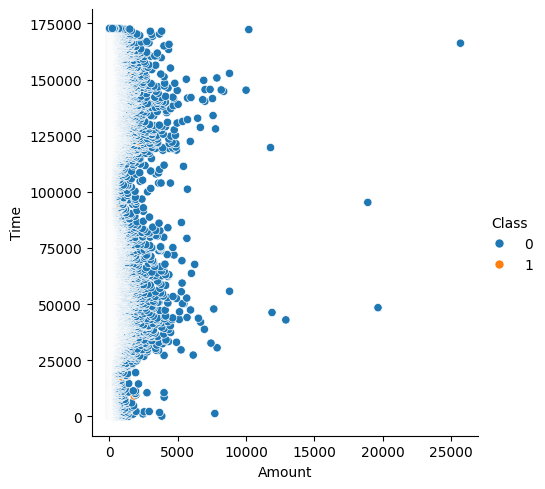

In [15]:
sns.relplot(x='Amount', y='Time', hue='Class', data=df)

Loads scikit-learn modules for splitting data and using linear models.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Separates the dataset into input features (X) and the target variable (y, which is the Class column).

In [17]:
X = df.iloc[:, :-1]
y = df['Class']

Divides the data into training and test sets using an 65-35 split.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

 Applies standard scaling to normalize the training and test feature sets for better model performance.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creates and fits a logistic regression classifier with balanced class weights to handle imbalanced data.

In [35]:
clf = linear_model.LogisticRegression(class_weight='balanced')
clf.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

Uses the trained model to predict fraud on the scaled test data and converts predictions/targets to arrays.

In [36]:
y_pred = np.array(clf.predict(X_test_scaled))
y = np.array(y_test)

 Loads functions for confusion matrix, accuracy, and classification report.

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Prints the confusion matrix to show true positives, false positives, etc.

In [38]:
print(confusion_matrix(y, y_pred))

[[97039  2473]
 [   12   159]]


Prints the overall accuracy of the model's predictions.

In [39]:
print(accuracy_score(y, y_pred))

0.9750709749907206


Prints detailed metrics like precision, recall, and F1-score for each class.

In [40]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     99512
           1       0.06      0.93      0.11       171

    accuracy                           0.98     99683
   macro avg       0.53      0.95      0.55     99683
weighted avg       1.00      0.98      0.99     99683



Prints detailed metrics like precision, recall, and F1-score for each class.

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Prints detailed metrics like precision, recall, and F1-score for each class.

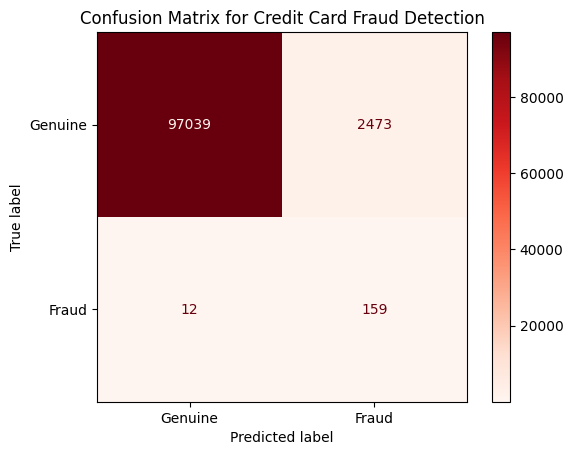

<Figure size 640x480 with 0 Axes>

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred),
                              display_labels= ['Genuine', 'Fraud'])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Credit Card Fraud Detection')
plt.show()

plt.savefig('confusion_matrix.png')